In [49]:
import numpy as np
from IPython.display import clear_output
import time 
import matplotlib.pyplot as plt

In [50]:
#actions
actions = [(0,1), (0, -1), (1, 0), (-1, 0)]
#diagonal actions
#actions = [(0,1), (0,-1), (1,0), (-1, 0), (1,1), (1,-1), (-1,1), (-1, -1)]
number_actions = len(actions)
Nx = 9
Ny = 6
#variables for the policy
alpha1 = .5
epsilon1 = .2
alpha2 = .6
epsilon2 = .2
R1 =-1
R2 = 1
gamma1 =1
gamma2 = 1


In [51]:
def grid(s1, s2):
    assert(0<=s1[0]<=Nx and 0<=s1[1]<=Ny)
    assert(0<=s1[0]<=Nx and 0<=s2[1]<=Ny)
    P = np.zeros((Nx+1,Ny+1))
    if s1[0]== s2[0] and s1[1]==s2[1]:
        P[s1] = 10
    else:
        P[s1] = 100
        P[s2] = 200
    print(P.T)

In [52]:
s1_ = (5,6)
s2_ = (4,5)

R = - 1.0/np.linalg.norm((s1_[0]- s2_[0], s1_[1] - s2_[1]))
print(type(R)==np.float64)

True


Let's define the Sarsa update rule

In [53]:
def update_Sarsa(s1,s2,a1,a2, R1,R2, s1_,s2_, a1_, a2_):
    #R2 = - 1.0/(np.linalg.norm((s1_[0]- s2_[0], s1_[1] - s2_[1]))+1)
    #type(R2)==np.float64
    if not(s1[0] == s2[0] and s1[1]==s2[1]):
        result1 = Q1[s1[0], s1[1], a1] + alpha1*(R1+gamma1*Q1[s1_[0], s1_[1], a1_,] - Q1[s1[0], s1[1], a1 ])
        result2 = Q2[s2[0], s2[1], a2] + alpha2*(R2+gamma2*Q2[s2_[0], s2_[1], a2_,] - Q2[s2[0], s2[1], a2 ])
    else:
        result1 = Q1[s1[0], s1[1], a1] + alpha1*(gamma1*Q1[s1_[0], s1_[1], a1_] - Q1[s1[0], s1[1],a1])
        result2 = Q2[s2[0], s2[1], a2] + alpha2*(gamma2*Q2[s2_[0], s2_[1], a2_] - Q2[s2[0], s2[1],a2])
    return result1, result2,R1,R2

In [54]:
def action_max(Q,s):
    argmax = None
    maxx = Q[s[0], s[1], 0]
    for (j,q) in enumerate(Q[s[0], s[1], :]):
        if q >=maxx:
            maxx   = q
            argmax = j
    return argmax 

In [55]:
def new_state(s,a):
    #wind = [0,0,0,-1,-1,-1,-2,-2,-1,0]
    if Nx>= s[0]+actions[a][0]>=0 and Ny>= s[1]+actions[a][1]>=0:
        #s_ = (s[0]+actions[a][0],max(0, s[1]+wind[s[0]]+actions[a][1]))
        s_ = (s[0]+actions[a][0],max(0, s[1]+actions[a][1]))
    else:
        s_ = s 
    return s_

In [56]:
s = (0,3)
z = (4,5)
grid(s, z)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 200.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


We initialize Q

In [57]:
Q1 = np.zeros((Nx+1,Ny+1, number_actions), dtype='float')
Q2 = np.zeros((Nx+1,Ny+1, number_actions), dtype='float')#Q[statex ,statey, action]
k = 0

In [58]:
np.random.randint(0,Ny+1, 2)
np.random.randint(0,Nx+1, 2)

array([1, 5])

In [59]:
iterations = []
R1_list = []
R2_list = []

We now create the the on-policy TD control loop

In [71]:
j = 0
while j <5+1: #number of episodes
    y_pos = np.random.randint(0,Ny+1, 2)
    x_pos = np.random.randint(0,Nx+1, 2)
    s1 = (x_pos[0],y_pos[0])
    a1 = action_max(Q1,s1)  #choose a from the state s using policy Q
    sumR1 = 0
    sumR2 = 0
    s2 = (x_pos[1],y_pos[1])
    a2 = action_max(Q2,s2)  
    i =0
    grid(s1, s2)
    while True:     # loop over each step of the episode,  here we have an undiscounted episodic task
        clear_output(wait=True)
        print('100: chat')
        print('200: souris')
        s1_ = new_state(s1,a1)         #new state
        s2_ = new_state(s2,a2) 
        #clear_output(wait=True)
        if np.random.binomial(1, epsilon2):
            a2_ = np.random.randint(0,number_actions)
        else:
            a2_ = action_max(Q2,s2_) 
        if np.random.binomial(1, epsilon1):
            a1_ = np.random.randint(0,number_actions)
        else:
            a1_ = action_max(Q1,s1_)  
        
        print(f'Episode {k}')
        print(f'mouv {i}')
        grid(s1_, s2_)
        Q1[s1[0], s1[1], a1], Q2[s2[0], s2[1], a2],r1,r2 = update_Sarsa(s1,s2,a1,a2, R1,R2, s1_,s2_, a1_, a2_)#update rule
        sumR1+=r1
        sumR2+=r2
        s1 = (s1_[0], s1_[1])
        s2 = (s2_[0], s2_[1])
        a1 = np.copy(a1_)
        a2 = np.copy(a2_)
        i+=1
        if s1[0] == s2[0] and s1[1]==s2[1]:
            R1_list.append(sumR1)
            R2_list.append(sumR2)
            break
        iterations.append(i)
        time.sleep(0.1)
    j+=1
    k+=1

100: chat
200: souris
Episode 4527
mouv 3
[[ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


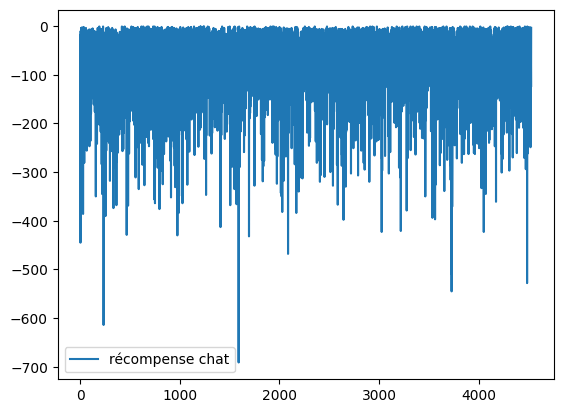

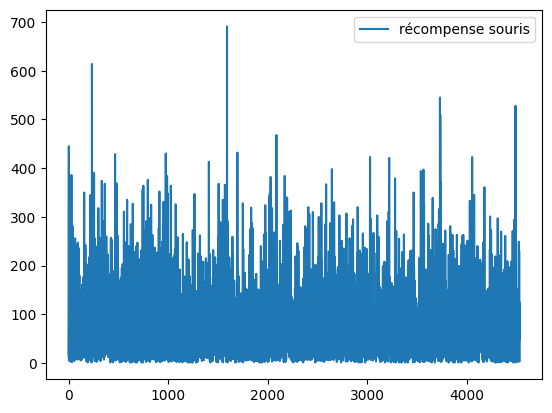

In [72]:
plt.plot(R1_list, label='récompense chat')
plt.legend()
plt.show()
plt.plot(R2_list, label='récompense souris')
plt.legend()
plt.show()